In [ ]:
### Final Project
# Student ID: 201786483

In [ ]:
# In this project, I want to find the relationship with population, free wifi areas and crime data. I want to find in Leeds whether the places with more free WiFi have a larger population,and may have more crime happened in these places.
# In the project, I found four datasets: resident number, population density, the location of wifi data and crime data.
# The residents and population density dataset I downloaded from census 2021 dataset.(https://www.nomisweb.co.uk/sources/census_2021)
# The wifi data came from Data Mill North (https://datamillnorth.org/); The crime data came from POLICE.UK.

In [1]:
# import required packages 
import geopandas as gpd
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.preprocessing import scale
import geoplot as gplt
import geoplot.crs as gcrs
sns.set_theme(style="white")

In [2]:
#load the first and second CSV file: residents in Leeds and population density in Leeds.
leeds_residents = pd.read_csv('D:\G5990-final-201786483\leeds_residents.csv')
leeds_density = pd.read_csv('D:\G5990-final-201786483\leeds_resident_density.csv')

In [3]:
# view first 5 rows of the residents datafame
leeds_residents.head()

,date,geography,geography code,Total Residents,Residence type: Lives in a household; measures: Value,Residence type: Lives in a communal establishment; measures: Value
0,2021,Leeds 001A,E01011698,1462,1460,2
1,2021,Leeds 001B,E01011699,1289,1289,0
2,2021,Leeds 001C,E01011701,1367,1367,0
3,2021,Leeds 001D,E01011702,1648,1648,0
4,2021,Leeds 001E,E01011703,1224,1224,0


In [4]:
# view first 5 rows of the population density datafame
leeds_density.head()

,date,geography,geography code,Population Density
0,2021,Leeds 001A,E01011698,4415.6
1,2021,Leeds 001B,E01011699,3925.1
2,2021,Leeds 001C,E01011701,3430.4
3,2021,Leeds 001D,E01011702,868.7
4,2021,Leeds 001E,E01011703,2943.7


In [5]:
# We can first join them together, and then exploring data and cleaning data.
# First, join them by geography code.
leeds_population =leeds_residents.merge(leeds_density, how='left',left_on='geography code',right_on='geography code')

In [6]:
# view first 5 rows of the datafame
leeds_population.head()

,date_x,geography_x,geography code,Total Residents,Residence type: Lives in a household; measures: Value,Residence type: Lives in a communal establishment; measures: Value,date_y,geography_y,Population Density
0,2021,Leeds 001A,E01011698,1462,1460,2,2021,Leeds 001A,4415.6
1,2021,Leeds 001B,E01011699,1289,1289,0,2021,Leeds 001B,3925.1
2,2021,Leeds 001C,E01011701,1367,1367,0,2021,Leeds 001C,3430.4
3,2021,Leeds 001D,E01011702,1648,1648,0,2021,Leeds 001D,868.7
4,2021,Leeds 001E,E01011703,1224,1224,0,2021,Leeds 001E,2943.7


In [7]:
# Look at the colums in the dataset
leeds_population.columns

Index(['date_x', 'geography_x', 'geography code', 'Total Residents',
       'Residence type: Lives in a household; measures: Value',
       'Residence type: Lives in a communal establishment; measures: Value',
       'date_y', 'geography_y', 'Population Density'],
      dtype='object')

In [8]:
# Now cleaning data, first drop the unwanted columns.These columns are no need in this task.
leeds_population=leeds_population.drop(columns =['date_x','Residence type: Lives in a household; measures: Value','Residence type: Lives in a communal establishment; measures: Value','date_y','geography_y'])
leeds_population.columns

Index(['geography_x', 'geography code', 'Total Residents',
       'Population Density'],
      dtype='object')

In [9]:
# Check the drop columns result and find the data types.
leeds_population.dtypes

geography_x            object
geography code         object
Total Residents         int64
Population Density    float64
dtype: object

In [10]:
# Check for missing data.There is no missing data.
leeds_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   geography_x         488 non-null    object 
 1   geography code      488 non-null    object 
 2   Total Residents     488 non-null    int64  
 3   Population Density  488 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.4+ KB


<Axes: >

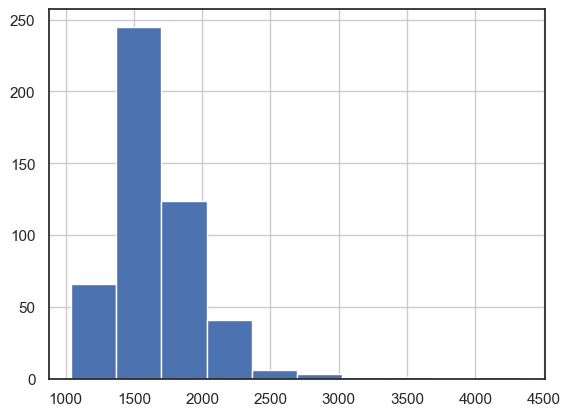

In [11]:
# Data visualisation. Plot a histogram of total residents
leeds_population['Total Residents'].hist()

D:\anaconda3.1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


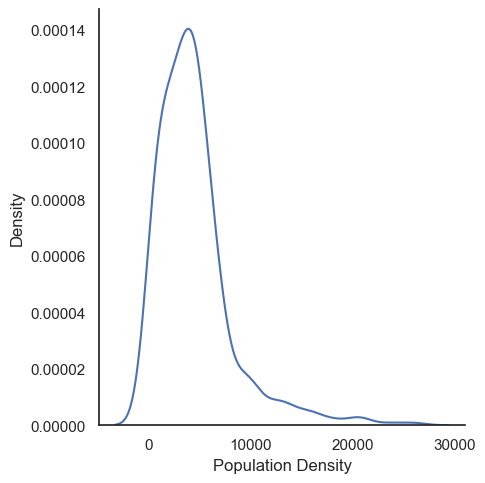

In [12]:
# Data visualisation. Plot a kde of population density
sns.displot(data=leeds_population, x='Population Density', kind='kde')

D:\anaconda3.1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


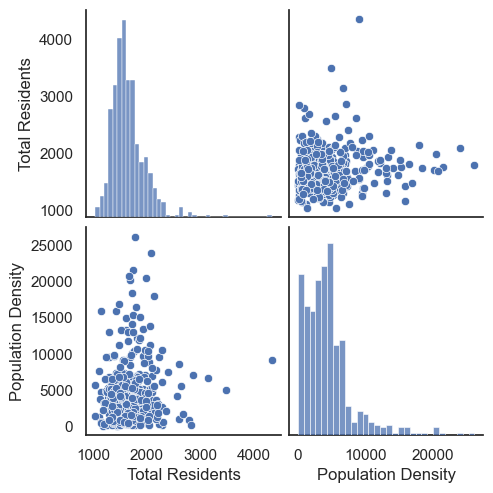

In [13]:
# Data visualisation
sns.pairplot(leeds_population);

In [39]:
# Because I want to find whether the more people, the more free wifi zones and higher crime rates in these areas.
# So now import the wifi dataset and crime in Leeds.
leeds_wifi_location = gpd.read_file("D:\G5990-final-201786483\wifi1.csv")
leeds_crime_location = gpd.read_file("D:\G5990-final-201786483\crime.csv")

In [40]:
# view first 5 rows of the wifi datafame
leeds_wifi_location.head()

,OID_,OBJECTID,LSOA21CD,LSOA21NM,LONG,LAT,wifi COUNT,geometry
0,1,6,E01011269,Leeds 011B,-1.67412,53.87003,2,None
1,2,18,E01011281,Leeds 059A,-1.60521,53.80999,1,None
2,3,11,E01011274,Leeds 010C,-1.68589,53.86258,4,None
3,4,24,E01011292,Leeds 071B,-1.59183,53.79603,2,None
4,5,13,E01011276,Leeds 011C,-1.68259,53.86383,2,None


In [41]:
# view first 5 rows of the crime datafame
leeds_crime_location.head()

,OID_,OBJECTID,FID,LSOA21CD,LSOA21NM,LONG,LAT,crime COUNT,geometry
0,451,464,31262,E01033010,Leeds 111B,-1.54188,53.7999,245,None
1,462,465,31263,E01033011,Leeds 111C,-1.53507,53.7965,160,None
2,97,99,10818,E01011369,Leeds 090E,-1.57662,53.77696,100,None
3,461,463,31261,E01033008,Leeds 111A,-1.55386,53.79961,99,None
4,449,468,31266,E01033016,Leeds 111E,-1.54418,53.79044,98,None


In [42]:
# First we can join them together and then cleaning data.We can join them by LSOA21CD.
wifi_crime =leeds_crime_location.merge(leeds_wifi_location, how='left',left_on='LSOA21CD',right_on='LSOA21CD')

In [43]:
# view first 5 rows of the new datafame to check the join result.
wifi_crime.head()

,OID__x,OBJECTID_x,FID,LSOA21CD,LSOA21NM_x,LONG_x,LAT_x,crime COUNT,geometry_x,OID__y,OBJECTID_y,LSOA21NM_y,LONG_y,LAT_y,wifi COUNT,geometry_y
0,451,464,31262,E01033010,Leeds 111B,-1.54188,53.7999,245,None,136,464,Leeds 111B,-1.54188,53.7999,7,None
1,462,465,31263,E01033011,Leeds 111C,-1.53507,53.7965,160,None,NaN,NaN,NaN,NaN,NaN,NaN,None
2,97,99,10818,E01011369,Leeds 090E,-1.57662,53.77696,100,None,NaN,NaN,NaN,NaN,NaN,NaN,None
3,461,463,31261,E01033008,Leeds 111A,-1.55386,53.79961,99,None,138,463,Leeds 111A,-1.55386,53.79961,5,None
4,449,468,31266,E01033016,Leeds 111E,-1.54418,53.79044,98,None,141,468,Leeds 111E,-1.54418,53.79044,1,None


In [44]:
# Look at the colums in the new dataset
wifi_crime.columns

Index(['OID__x', 'OBJECTID_x', 'FID', 'LSOA21CD', 'LSOA21NM_x', 'LONG_x',
       'LAT_x', 'crime COUNT', 'geometry_x', 'OID__y', 'OBJECTID_y',
       'LSOA21NM_y', 'LONG_y', 'LAT_y', 'wifi COUNT', 'geometry_y'],
      dtype='object')

In [45]:
# Now cleaning data, first drop the unwanted and no needed columns.
wifi_crime=wifi_crime.drop(columns =['OID__x','OBJECTID_x','FID','OID__y','OBJECTID_y','LSOA21NM_x', 'LSOA21NM_y','LONG_y','LAT_y','geometry_x', 'geometry_y'])
wifi_crime.columns

Index(['LSOA21CD', 'LONG_x', 'LAT_x', 'crime COUNT', 'wifi COUNT'], dtype='object')

In [46]:
# Look at the data types and check the result of drop columns.
wifi_crime.dtypes

LSOA21CD       object
LONG_x         object
LAT_x          object
crime COUNT    object
wifi COUNT     object
dtype: object

In [47]:
# Some data type need to be changed. So now change the longitude,latitude and crime count, wifi count to float.
wifi_crime['LONG_x'] =wifi_crime['LONG_x'].astype(float)
wifi_crime['LAT_x'] =wifi_crime['LAT_x'].astype(float)
wifi_crime['crime COUNT'] =wifi_crime['crime COUNT'].astype(float)
wifi_crime['wifi COUNT'] =wifi_crime['wifi COUNT'].astype(float)

In [48]:
# Check for changing type and missing data.There is no missing data.
wifi_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LSOA21CD     486 non-null    object 
 1   LONG_x       486 non-null    float64
 2   LAT_x        486 non-null    float64
 3   crime COUNT  486 non-null    float64
 4   wifi COUNT   147 non-null    float64
dtypes: float64(4), object(1)
memory usage: 19.1+ KB


In [49]:
# Now join the leeds_population and wifi_crime together to find these correlation with population.
people_wifi_crime =leeds_population.merge(wifi_crime, how='left',left_on='geography code',right_on='LSOA21CD')

In [50]:
# Check the columns of new dataset.
people_wifi_crime.columns

Index(['geography_x', 'geography code', 'Total Residents',
       'Population Density', 'LSOA21CD', 'LONG_x', 'LAT_x', 'crime COUNT',
       'wifi COUNT'],
      dtype='object')

In [42]:
## Non-spatial outputs: Using graph and chart to explain the relationship between population density, wifi areas and crime.

# From the charts below, in Leeds, the more free wifi areas, the higher population density there and more crime happened.
# From the Spearman correlation and heat map, all these four factors have a positive correlation with each other:
#   First, the more residents here, the population density will be higher.
#   Secondly, the more free wifi areas here, the more residents and population density will be higher.
#   Then, the more residents here, the higher population density, the more crime may happened here.
#   Finally, the more free wifi areas here, the more crime occured.

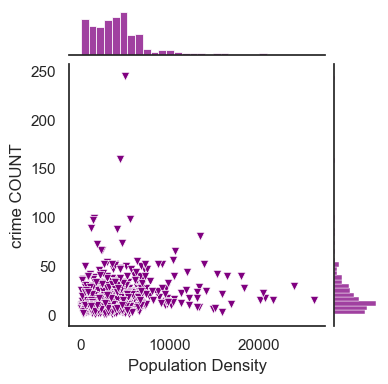

In [51]:
# First, from the graph, the higher population density, the more crime happened.
sns.jointplot(x='Population Density',y='crime COUNT', color='purple', kind ='scatter',data=people_wifi_crime, height=4,marker='v');

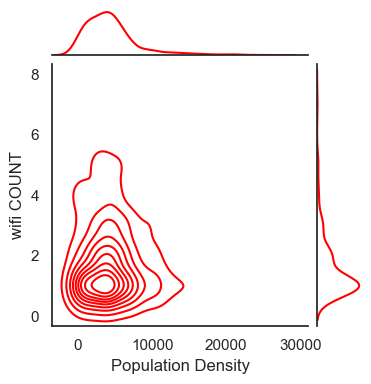

In [52]:
# From the graph below, the more free wifi in these areas, the higher population density,
sns.jointplot(x='Population Density',y='wifi COUNT', color='red', kind ='kde',data=people_wifi_crime,height=4);

In [55]:
# Calculate Spearman's rank correlation
leeds_corr =people_wifi_crime[['crime COUNT','wifi COUNT','Total Residents',
       'Population Density']].corr(method = 'spearman')
leeds_corr

,crime COUNT,wifi COUNT,Total Residents,Population Density
crime COUNT,1.000000,0.280372,0.365832,0.247829
wifi COUNT,0.280372,1.000000,0.165443,0.053399
Total Residents,0.365832,0.165443,1.000000,0.110253
Population Density,0.247829,0.053399,0.110253,1.000000


Labels: Index(['crime COUNT', 'wifi COUNT', 'Total Residents', 'Population Density'], dtype='object') Index(['crime COUNT', 'wifi COUNT', 'Total Residents', 'Population Density'], dtype='object')
Labels with capital letters: ['Crime count', 'Wifi count', 'Total residents', 'Population density'] ['Crime count', 'Wifi count', 'Total residents', 'Population density']


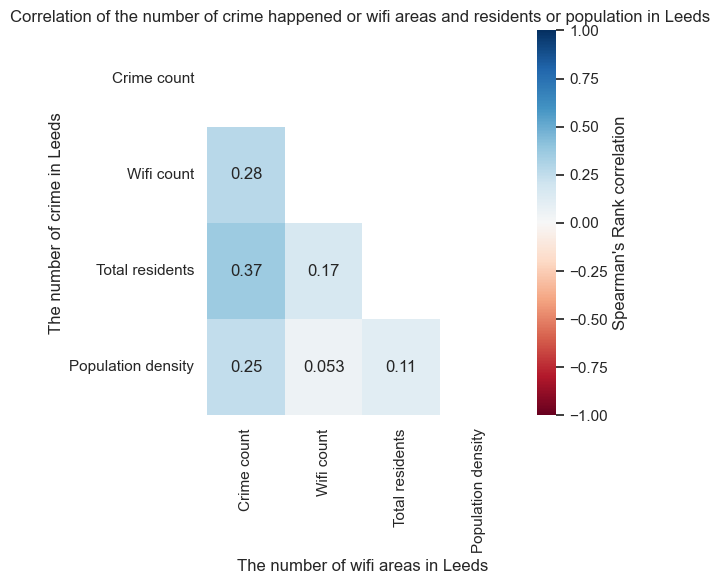

In [54]:
#From the Spearman correlation, these correlations are all positive. The more residents and higer population density, the more free wifi areas and more crime happened in these place.

fig,ax = plt.subplots(figsize=(5,5))

# define mask to apply to upper right hand corner of the plot
data_to_mask = np.triu(np.ones_like(leeds_corr))

# define axis tick labels
x_axis_labels = leeds_corr.columns
y_axis_labels = leeds_corr.index

# Have a look at what the tick labels look like
print('Labels:',x_axis_labels ,y_axis_labels)

# for each element in the list of x_axis_labels, capitalize it
x_axis_labels = [element.capitalize() for element in x_axis_labels]
y_axis_labels = [element.capitalize() for element in y_axis_labels]

# look at the new labels
print('Labels with capital letters:',x_axis_labels ,y_axis_labels)


# plot a heatmap of the correlation dataframe
sns.heatmap(leeds_corr, 
            # annotate so spearman's rank correlation values are displayed on the squares
            annot=True, 
            # define colourmap
            cmap='RdBu', 
            # define value of minimum colour on cbar
            vmin=-1, 
            # define value of maximum colour on cbar
            vmax=1,
            # add the mask
            mask=data_to_mask, 
            # use the custom tick labels
            xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels,
            # add a label to the cbar
            cbar_kws={'label': "Spearman's Rank correlation"},
            # plot on the axis we defined
            ax=ax)

# Set axis labels
ax.set(xlabel="The number of wifi areas in Leeds", 
       ylabel="The number of crime in Leeds",
      title ='Correlation of the number of crime happened or wifi areas and residents or population in Leeds ' );

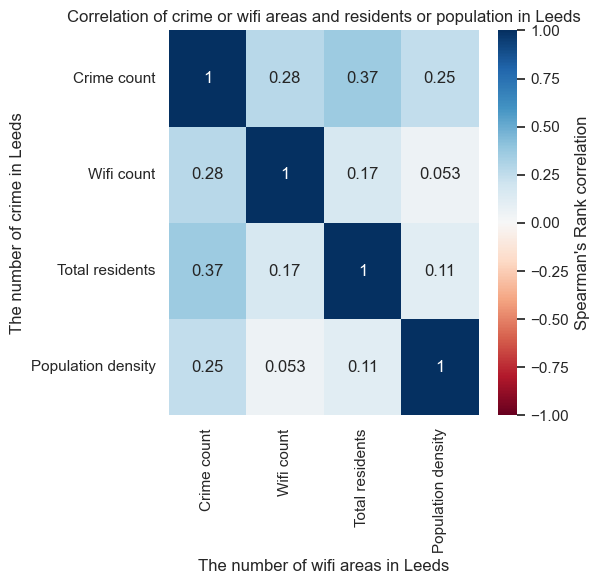

In [81]:
# define plot size
fig,ax = plt.subplots(figsize=(5,5))

# plot a heatmap of the correlation dataframe
sns.heatmap(leeds_corr, 
            # annotate so spearman's rank correlation values are displayed on the squares
            annot=True, 
            # define colourmap
            cmap='RdBu', 
            # define value of minimum colour on cbar
            vmin=-1, 
            # define value of maximum colour on cbar
            vmax=1,
            # comment out the mask
            #mask=data_to_mask, 
            # use the custom tick labels
            xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels,
            # add a label to the cbar
            cbar_kws={'label': "Spearman's Rank correlation"},
            # plot on the axis we defined
            ax=ax)

# Set axis labels
ax.set(xlabel="The number of wifi areas in Leeds", 
       ylabel="The number of crime in Leeds",
      title ='Correlation of crime or wifi areas and residents or population in Leeds' );

In [ ]:
# Spatial outputs: Using map to find the relationship between population,wifi and crime.

# In this part, we can use map to show the spatial pattern of these four factors. And I add the Leeds.json and wifi.json to find the spatial pattern.

# From the maps, the residents, high population density areas and most of the crime areas are all concentrated in the central and most of the southwest areas of Leeds.
#And we can see that the more residents,the higher population density, the more crime happened in these areas.

# Then,we can add wifi,json to analysis, from the maps, the free wifi areas are concentrated in city center and some southwest areas of Leeds.
#And after I set a 500m buffer, the free wifi areas are concentrated in the areas which has more people, higher population density and more crime areas.

In [30]:
# First, add the Leeds json file.
leeds_shp =gpd.read_file('D:\G5990-final-201786483\Leeds.geojson')

In [31]:
#Explor the data of Leeds
leeds_shp.head()

,FID,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,10720,E01011264,Leeds 011A,420937,441836,-1.68306,53.87232,14a73329-fc8f-464c-a4fa-1963baa35500,"POLYGON ((421248.688 442315.812, 421284.073 44..."
1,10721,E01011265,Leeds 009A,418988,441951,-1.71269,53.87343,eda471dd-f408-4dab-917e-c5e188310b35,"POLYGON ((418635.000 442559.000, 418637.555 44..."
2,10722,E01011266,Leeds 008A,417489,442615,-1.73545,53.87945,286c32c5-ef49-4ecc-a45e-57630c165c62,"POLYGON ((417783.688 443382.312, 417788.688 44..."
3,10723,E01011267,Leeds 009B,419641,442025,-1.70276,53.87407,318cfaa3-9f08-4d61-a30e-82e903f3a7ba,"POLYGON ((419607.843 442388.568, 419612.752 44..."
4,10724,E01011268,Leeds 010A,420224,441935,-1.69390,53.87324,049e79f0-cd9e-47dc-848b-b6d6fa6825ac,"POLYGON ((420442.406 442436.687, 420443.313 44..."


In [32]:
# We can drop the unwanted columns first.
leeds_shp=leeds_shp.drop(columns =['BNG_E','BNG_N','GlobalID'])
leeds_shp.columns

Index(['FID', 'LSOA21CD', 'LSOA21NM', 'LONG', 'LAT', 'geometry'], dtype='object')

In [56]:
# Now join the people_wifi_crime CSV and the leed_shp file together
leeds_crime_wifi =leeds_shp.merge(people_wifi_crime, how='left',left_on='LSOA21CD',right_on='LSOA21CD')

In [57]:
#Explor the data of Leeds_crime_wifi
leeds_crime_wifi.head()

,FID,LSOA21CD,LSOA21NM,LONG,LAT,geometry,geography_x,geography code,Total Residents,Population Density,LONG_x,LAT_x,crime COUNT,wifi COUNT
0,10720,E01011264,Leeds 011A,-1.68306,53.87232,"POLYGON ((421248.688 442315.812, 421284.073 44...",Leeds 011A,E01011264,1284.0,2014.1,-1.68306,53.87232,6.0,NaN
1,10721,E01011265,Leeds 009A,-1.71269,53.87343,"POLYGON ((418635.000 442559.000, 418637.555 44...",Leeds 009A,E01011265,1955.0,3706.9,-1.71269,53.87343,36.0,2.0
2,10722,E01011266,Leeds 008A,-1.73545,53.87945,"POLYGON ((417783.688 443382.312, 417788.688 44...",Leeds 008A,E01011266,2613.0,1032.2,-1.73545,53.87945,11.0,NaN
3,10723,E01011267,Leeds 009B,-1.70276,53.87407,"POLYGON ((419607.843 442388.568, 419612.752 44...",Leeds 009B,E01011267,1699.0,3782.3,-1.70276,53.87407,20.0,NaN
4,10724,E01011268,Leeds 010A,-1.69390,53.87324,"POLYGON ((420442.406 442436.687, 420443.313 44...",Leeds 010A,E01011268,1395.0,3531.6,-1.69390,53.87324,11.0,NaN


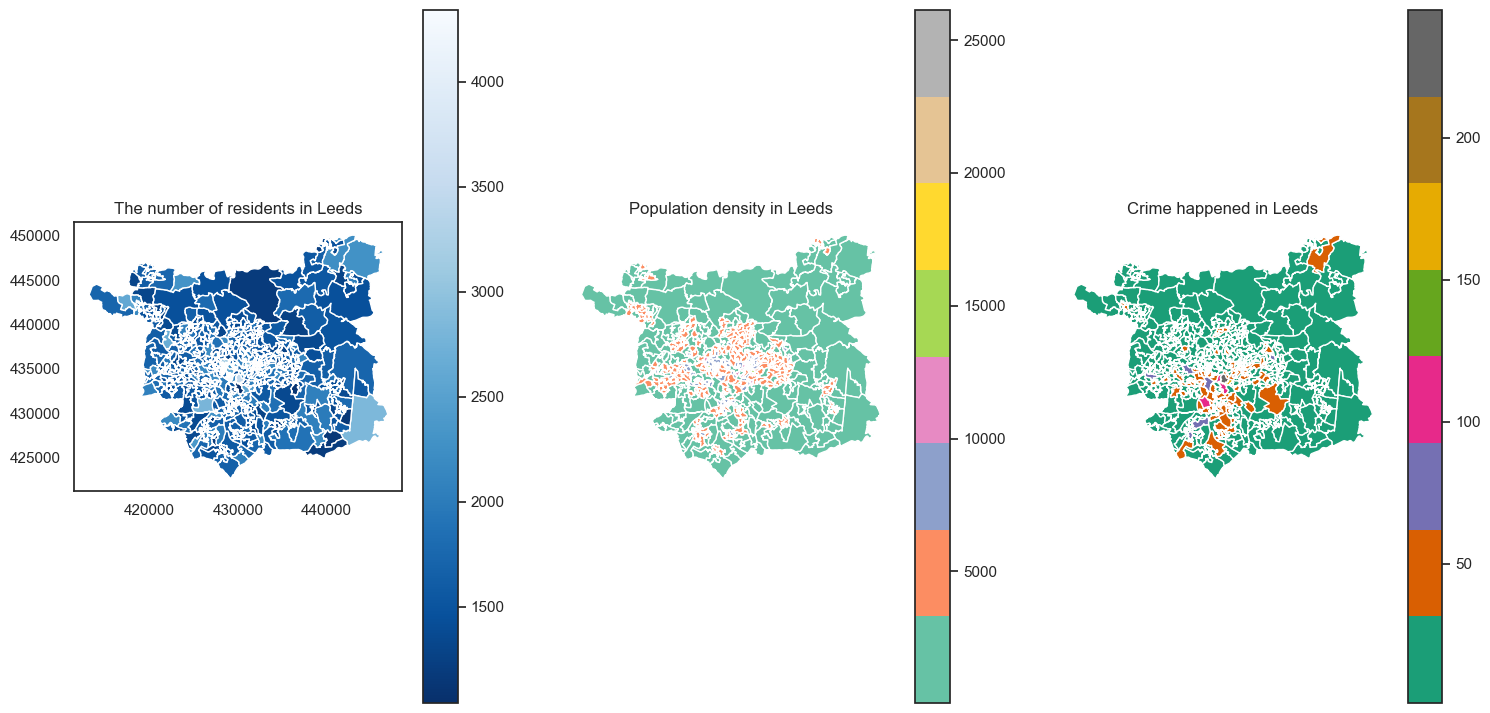

In [60]:
# creat three maps for residents and population density and crime in Leeds. 
#From maps, the residents are concentrated in city center and some southwest areas in Leeds, and these areas have higher population density.
#The crime data is less, and most of them concentrated in some southwest areas.
f,ax = plt.subplots(1,3, figsize=(18,9))

leeds_crime_wifi.plot(ax=ax[0], column ='Total Residents', legend=True, cmap='Blues_r')
leeds_crime_wifi.plot(ax=ax[1], column ='Population Density', legend=True, cmap='Set2')
leeds_crime_wifi.plot(ax=ax[2], column ='crime COUNT',legend=True, cmap='Dark2')


ax[0].set_title('The number of residents in Leeds')
ax[1].set_title('Population density in Leeds')
ax[2].set_title('Crime happened in Leeds')


ax[0].legend_kwds={'loc': 'center left','bbox_to_anchor':(1,0.5)}

ax[1].set_axis_off()
ax[2].set_axis_off()

plt.show()

In [61]:
# Because not all the ward have free wifi areas, so I decided to analyze wifi separately.
# First load the wifi json file.
leeds_wifi = gpd.read_file("D:\G5990-final-201786483\WiFi locations.geojson")

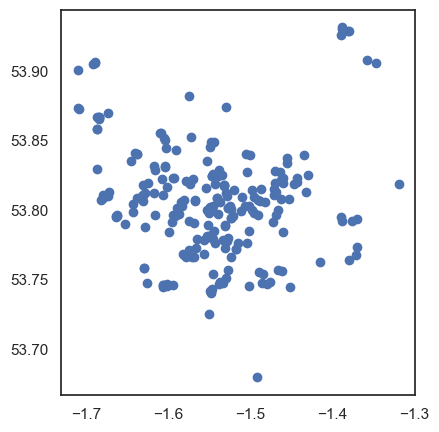

In [62]:
#map the dataset
f,ax = plt.subplots(1, figsize=(5, 5))
leeds_wifi.plot(ax=ax)
plt.show()

In [63]:
# Check the CRS and it is different with leed_shp 
print(leeds_shp.crs, leeds_wifi.crs)

epsg:27700 epsg:4326


In [64]:
#I need to change the CRS in order to map them together
leeds_wifi_new= leeds_wifi.to_crs(epsg=27700)

In [65]:
# Check the CRS and now are the same
print(leeds_shp.crs, leeds_wifi_new.crs)

epsg:27700 epsg:27700


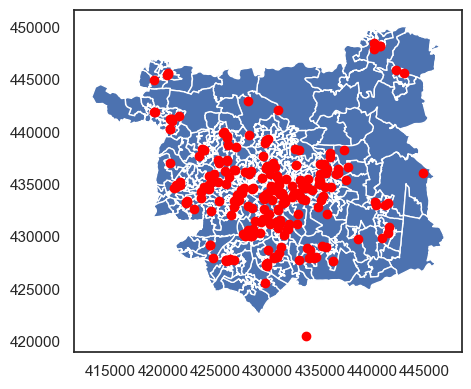

In [66]:
#create a map of leeds_shp and wifi areas. Most of the areas which have wifi are concentrated in central and southwest areas of leeds.
# plot one subplot (1 map), with dimensions 5 X 5
f, ax = plt.subplots(1, figsize=(5, 5))

# define the basemap plot it on the sublot axis
base = leeds_shp.plot(ax=ax)

# plot the cities on the basemap axis, colour the cities red
leeds_wifi_new.plot(ax=base,color='red')

# show the map
plt.show()

In [67]:
# Now I found that there is a point near the bottom of map which is not in Leeds, so we need to cleaning data and drop this point.
# First, I add this json file in ArcGIS Pro, and find that point's name is 'West Yorkshire History Centre', so we can fing this point.
leeds_wifi_new.loc[leeds_wifi_new['Name']=='West Yorkshire History Centre']

,Name,Latitude,Longitude,Address1,Address2,Address3,Town,Region,PostalCode,CountryCode,Stage,Type,NumberOfAccessPoints,Accessibility,Protection,GovroamEnabled,geometry
160,West Yorkshire History Centre,53.67973711,-1.491534595,127 Kirkgate,None,None,Wakefield,West Yorkshire,WF1 1JG,GB,Active,SingleSpot,None,No Restrictions,WPA2,1,POINT (433683.325 420483.738)


In [68]:
# And we find the point is on the row of 160, then we can drop it.
leeds_wifi_new = leeds_wifi_new.drop([160], axis=0)

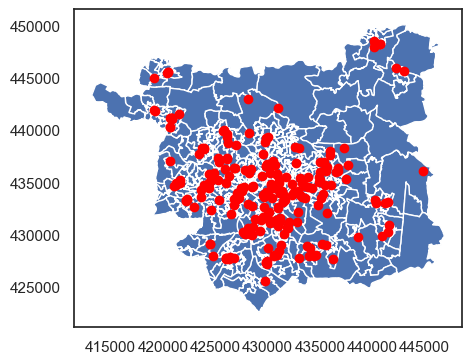

In [69]:
# Now check the result and we delete it successfully.
f, ax = plt.subplots(1, figsize=(5, 5))
base = leeds_shp.plot(ax=ax)
leeds_wifi_new.plot(ax=base,color='red')
plt.show()

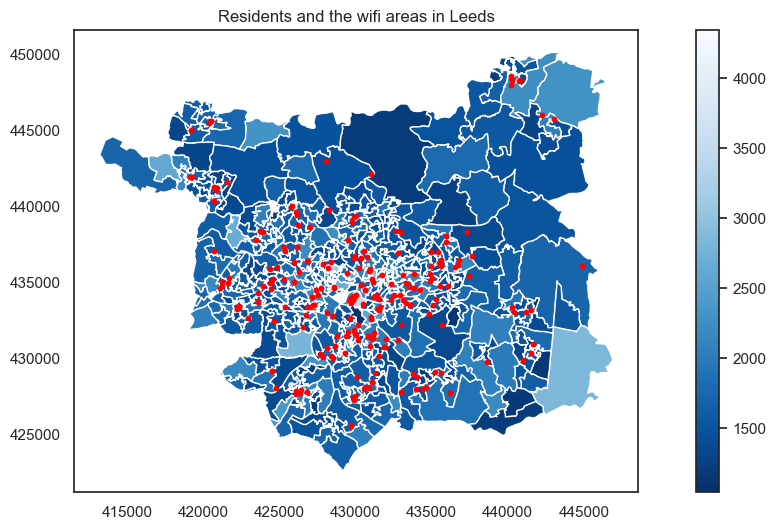

In [86]:
#create a map of leeds residents and wifi areas. 
f, ax = plt.subplots(1, figsize=(15, 6))

# define the basemap plot it on the sublot axis
base = leeds_crime_wifi.plot(ax=ax,column ='Total Residents',legend=True, cmap='Blues_r')
# plot the cities on the basemap axis, colour the cities red
leeds_wifi_new.plot(ax=base,color='red',markersize=10)
# show the map
plt.title('Residents and the wifi areas in Leeds')
plt.show()

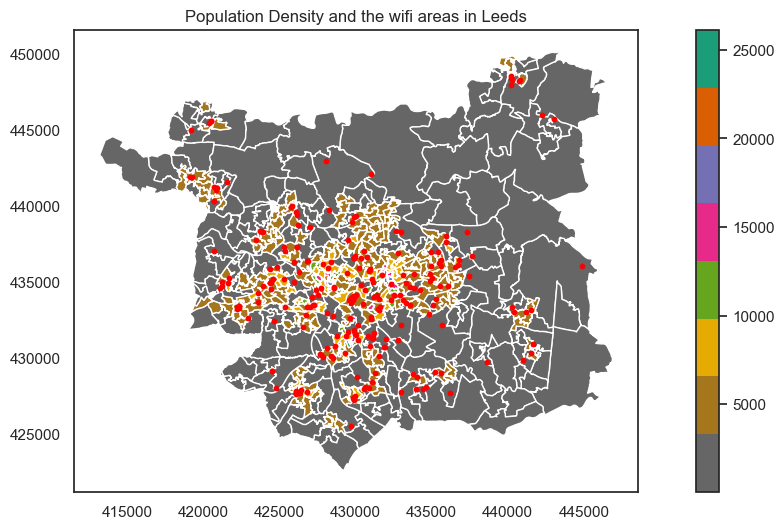

In [87]:
#create a map of leeds Population density and wifi areas.
f, ax = plt.subplots(1, figsize=(15, 6))

# define the basemap plot it on the sublot axis
base = leeds_crime_wifi.plot(ax=ax,column ='Population Density',legend=True, cmap='Dark2_r')
# plot the cities on the basemap axis, colour the cities red
leeds_wifi_new.plot(ax=base,color='red',markersize=10)
# show the map
plt.title('Population Density and the wifi areas in Leeds')
plt.show()

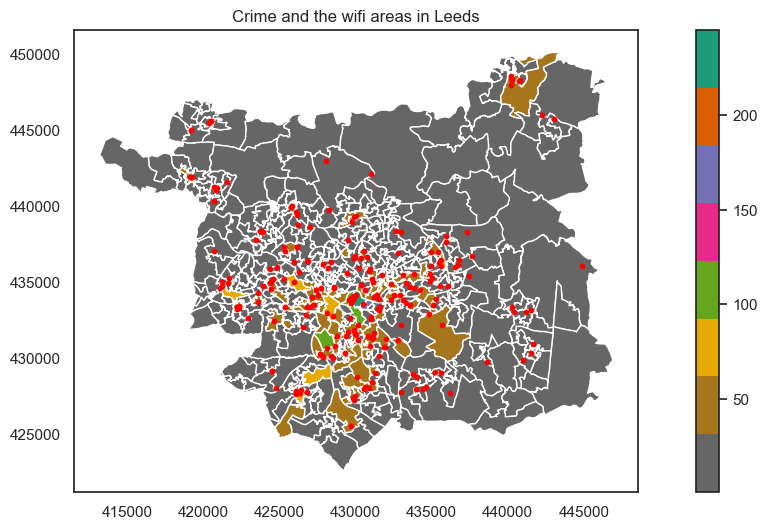

In [88]:
#create a map of leeds crime and wifi areas.
f, ax = plt.subplots(1, figsize=(15, 6))
# define the basemap plot it on the sublot axis
base = leeds_crime_wifi.plot(ax=ax,column ='crime COUNT',legend=True, cmap='Dark2_r')
# plot the cities on the basemap axis, colour the cities red
leeds_wifi_new.plot(ax=base,color='red',markersize=10)
# show the map
plt.title('Crime and the wifi areas in Leeds')
plt.show()

In [74]:
# set a buffer in the wifi file.
leeds_wifi_new_buffer = leeds_wifi_new.copy()
leeds_wifi_new_buffer['geometry'] = leeds_wifi_new.buffer(500)

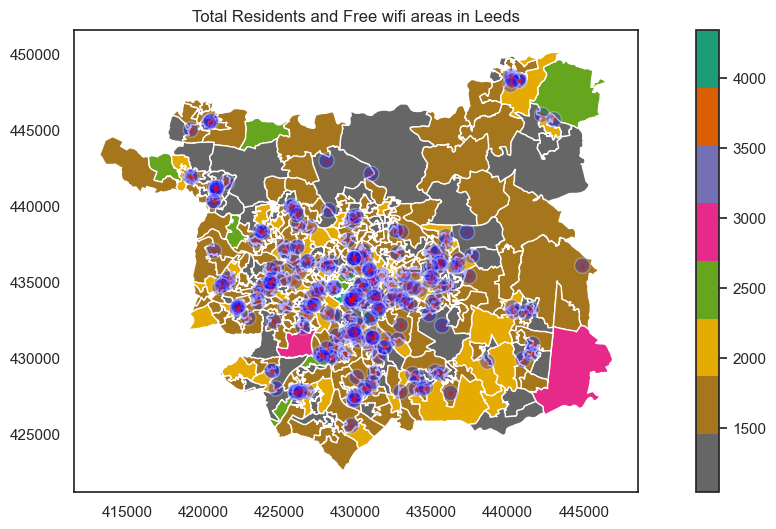

In [75]:
#From map,the areas with wifi concentrated are also have more residents.

# produce a plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
# get the ith item in the decile column list and plot
base = leeds_crime_wifi.plot(ax=ax, column ='Total Residents', legend=True, cmap='Dark2_r')
# plot the city buffers on the basemap axis, colour buffers blue
leeds_wifi_new_buffer.plot(ax=base,color='blue', alpha=0.3)
# plot the cities on the basemap axis, colour the cities red
leeds_wifi_new.plot(ax=base,color='red',markersize=6, alpha=0.3)
plt.title('Total Residents and Free wifi areas in Leeds')
plt.show()

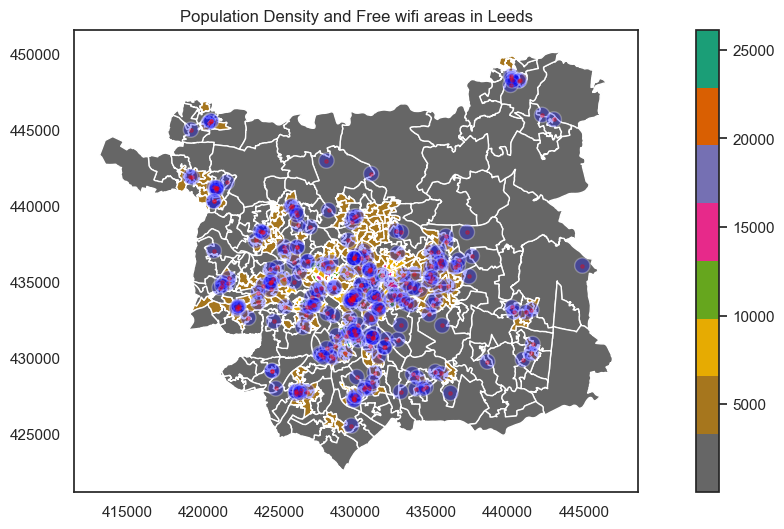

In [76]:
# produce a plot, from the map, the areas with wifi concentrated are also have higher population density.
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
# get the ith item in the decile column list and plot
base = leeds_crime_wifi.plot(ax=ax, column ='Population Density', legend=True, cmap='Dark2_r')
# plot the city buffers on the basemap axis, colour buffers blue
leeds_wifi_new_buffer.plot(ax=base,color='blue', alpha=0.3)
# plot the cities on the basemap axis, colour the cities red
leeds_wifi_new.plot(ax=base,color='red',markersize=6, alpha=0.3)
plt.title('Population Density and Free wifi areas in Leeds')
plt.show()

In [ ]:
# In conclusion, the more people, the higher population density, the free wifi zones wii be more, and may have more crime happened.